<a href="https://colab.research.google.com/github/XavierCarrera/movie-budget-prediction/blob/main/Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.simplefilter("ignore")

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

%matplotlib inline

In [4]:
X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/db/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [5]:
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)
X2_train,X2_test, y2_train,y2_test = train_test_split(X,y, random_state=1)

In [6]:
pd.DataFrame.equals(X_train,X2_train)

True

In [7]:
scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [8]:
scores.mean()

0.44964021745791766

In [9]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

0.7926190294963359

In [11]:
results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results

{'fit_time': array([0.00787759, 0.02791047, 0.02451634, 0.02354264, 0.01945186]),
 'score_time': array([0.00190639, 0.00206685, 0.00204396, 0.00195074, 0.00199604]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [12]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039036
0.44964021745791766


In [14]:
cross_validate(KNeighborsRegressor(), X, y, cv=5)

{'fit_time': array([0.0070107 , 0.00359774, 0.00286222, 0.00271535, 0.00295734]),
 'score_time': array([0.00447011, 0.00474143, 0.00417209, 0.00413203, 0.00341964]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077])}

In [15]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)

{'fit_time': array([0.00413108, 0.00311089, 0.00274777, 0.00273848, 0.00274539]),
 'score_time': array([0.00542927, 0.00484228, 0.00485015, 0.00463104, 0.00391459]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ])}

In [19]:
n = np.arange(2,50,2)

In [20]:
train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [21]:
np.mean(train_scores,axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

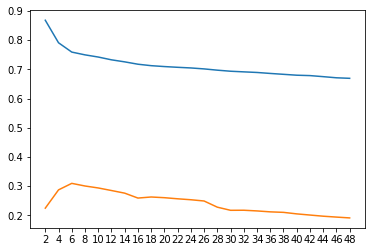

In [22]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n);

In [24]:
lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
samples, train, test = lc[0], lc[1], lc[2]

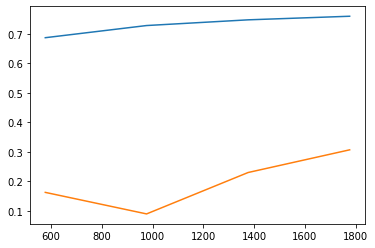

In [25]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])